#Загрузка данных

https://drive.google.com/file/d/17drXbvrpEf4PkFsYVdFqAgAAsuzygF4u/view?usp=sharing

In [1]:
! gdown 17drXbvrpEf4PkFsYVdFqAgAAsuzygF4u

Downloading...
From: https://drive.google.com/uc?id=17drXbvrpEf4PkFsYVdFqAgAAsuzygF4u
To: /content/uk_used_cars_kaggle.zip
100% 1.15M/1.15M [00:00<00:00, 99.1MB/s]


In [2]:
! unzip /content/uk_used_cars_kaggle.zip -d /content/uk_used_cars_kaggle

Archive:  /content/uk_used_cars_kaggle.zip
  inflating: /content/uk_used_cars_kaggle/audi.csv  
  inflating: /content/uk_used_cars_kaggle/bmw.csv  
  inflating: /content/uk_used_cars_kaggle/cclass.csv  
  inflating: /content/uk_used_cars_kaggle/focus.csv  
  inflating: /content/uk_used_cars_kaggle/ford.csv  
  inflating: /content/uk_used_cars_kaggle/hyundi.csv  
  inflating: /content/uk_used_cars_kaggle/merc.csv  
  inflating: /content/uk_used_cars_kaggle/skoda.csv  
  inflating: /content/uk_used_cars_kaggle/toyota.csv  
  inflating: /content/uk_used_cars_kaggle/unclean cclass.csv  
  inflating: /content/uk_used_cars_kaggle/unclean focus.csv  
  inflating: /content/uk_used_cars_kaggle/vauxhall.csv  
  inflating: /content/uk_used_cars_kaggle/vw.csv  


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/uk_used_cars_kaggle/bmw.csv')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
len(df)

10781

#Обучающая и тестовая выборка

Выполним разбиение датасета на обучающую (train) и тестовую (test) группы:
test - 25%,
train - 75%

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df,random_state=42)

In [9]:
len(test) / len(df)

0.2500695668305352

#Анализ данных

Проверка на наличие пропусков:

In [10]:
df.isna().mean()

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

Визуализация train (гистограмма):

In [11]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

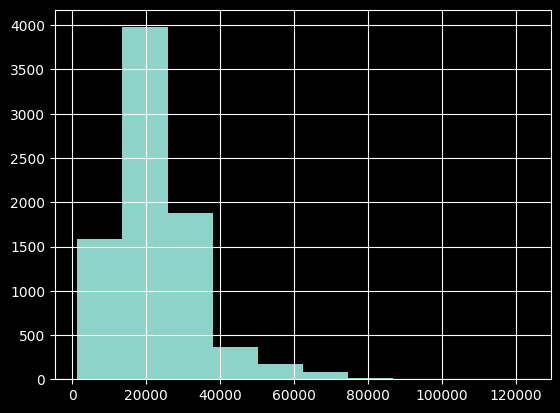

In [12]:
train.price.hist()

In [13]:
train.price.describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

Сводные данные год-цена (train):

In [14]:
from sqlalchemy.sql.expression import asc
train.groupby('year').price.agg(['count','mean','median']).sort_values('year',ascending=False)

,count,mean,median
year,,,
2020,552,35359.445652,32450.5
2019,2598,31066.986143,27980.0
2018,635,22562.450394,21000.0
2017,1296,19205.839506,18299.5
2016,1398,16531.655222,15699.5
2015,716,15086.536313,14103.5
2014,384,13411.333333,12797.5
2013,253,11041.347826,10490.0
2012,92,9432.923913,8990.0


<Axes: xlabel='year'>

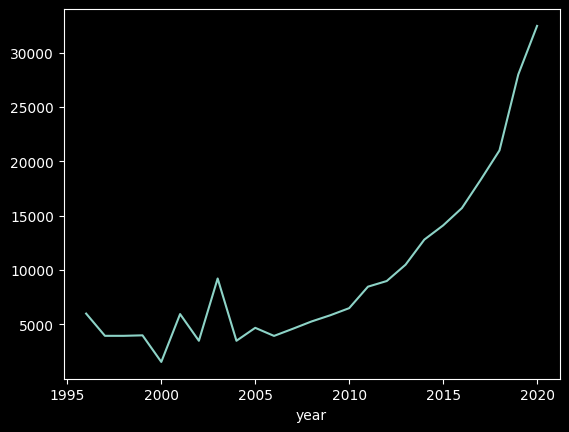

In [15]:
train.groupby('year').price.median().plot()

#Baseline

Модель предсказания стоимости по среднему значению:

In [16]:
train['price_pred_mean'] = train.price.mean()

In [17]:
train['err'] = train['price_pred_mean'] - train['price']

In [18]:
train['err_abs'] = abs(train['err'])

In [19]:
train['err_abs'].mean()

8450.556631461715

In [20]:
train['err_abs_pct'] = train['err_abs'] / train['price']

In [21]:
train['err_abs_pct'].mean()

0.48316912602731443

In [22]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

Модель предсказания стоимости по медианному значению:

In [23]:
train['price_pred_median'] = train.price.median()

In [24]:
mean_absolute_error(train['price'], train['price_pred_median'])

8220.5146567718

In [25]:
mean_absolute_percentage_error(train['price'], train['price_pred_median'])

0.41711111879393314

Медианное значение точнее предсказывает цену авто, принимем его в качестве baseline метрики.

Проверим корректность модели предсказания цены baseline на тестовой выборке:

In [26]:
test['price_pred_median'] = train.price.median()

In [27]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,20022.0


In [28]:
mean_absolute_error(test['price'], test['price_pred_median'])

8211.845697329376

In [29]:
mean_absolute_percentage_error(test['price'], test['price_pred_median'])

0.409212791738344

Точность для теста соответствует полученной точности для обучающей выборки. Принимаем, что полученная модель работает на тесте аналогичным образом как и на обучающей выборке.

#Алгоритм на основании года

In [30]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [31]:
model_year_mean = train.groupby('year')['price'].mean().reset_index()

In [32]:
model_year_mean.columns = ['year', 'price_pred_year_mean']

In [33]:
model_year_mean

,year,price_pred_year_mean
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


In [34]:
train = train.merge(model_year_mean,how='left',on='year')

In [35]:
mean_absolute_error(train['price'], train['price_pred_year_mean'])

5474.243598515644

In [36]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_mean'])

0.2447228468704618

Проверяем модель на тестовой выборке:

In [37]:
test = test.merge(model_year_mean,how='left',on='year')

In [38]:
test.isna().mean()

model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [39]:
mean_absolute_error(test['price'], test['price_pred_year_mean'])

5426.271071211102

In [40]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_mean'])

0.23933940428873632

#Медиана по году

In [41]:
model_year_median = train.groupby('year')['price'].median().reset_index()

In [42]:
model_year_median = model_year_median.rename({'price':'price_pred_year_median'},axis=1)

In [43]:
model_year_median

,year,price_pred_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [44]:
train = train.merge(model_year_median,how='left',on='year')

In [45]:
mean_absolute_error(train['price'], train['price_pred_year_median'])

5232.327891156463

In [46]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_median'])

0.21723436816638503

Тестовая выборка:

In [47]:
test = test.merge(model_year_median,how='left',on='year')

In [48]:
mean_absolute_error(test['price'], test['price_pred_year_median'])

5240.677299703264

In [49]:
mean_absolute_percentage_error(test['price'], test['price_pred_year_median'])

0.21478293590399475

#Добавляем переменную по объему двигателя


In [50]:
train.groupby('engineSize')['price'].agg(['count','mean','median'])

,count,mean,median
engineSize,,,
0.0,32,18469.906250,18250.0
0.6,6,17973.333333,18200.0
1.0,1,17400.000000,17400.0
1.5,1146,17104.345550,15881.5
1.6,75,9230.240000,8890.0
1.9,5,3968.000000,3950.0
2.0,4925,20697.721624,19792.0
2.2,4,6010.000000,3972.5
2.5,8,4532.375000,3892.5


In [51]:
def engine_group(x):
  if x <= 1.5:
    return '<=1.5'
  if x <= 2.0:
    return '<=2.0'
  return '>2.0'

In [52]:
train['engine_group'] = train['engineSize'].apply(engine_group)

In [53]:
train.groupby('engine_group')['price'].agg(['count','mean','median'])

,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2.0,5005,20509.168232,19499.0
>2.0,1895,31826.479683,27500.0


#Дополняем модель параметром engine_group

In [54]:
model_year_engine_median = train.groupby(['year','engine_group'])['price'].median().reset_index()

In [55]:
model_year_engine_median

,year,engine_group,price
0,1996,>2.0,5995.0
1,1997,<=2.0,3950.0
2,1998,<=2.0,3950.0
3,1999,<=2.0,3995.0
4,2000,>2.0,1550.0
5,2001,<=1.5,13000.0
6,2001,>2.0,4500.0
7,2002,<=2.0,3999.0
8,2002,>2.0,2990.0
9,2003,>2.0,9222.5


In [56]:
t = train.pivot_table(index='year',columns='engine_group',values='price', aggfunc='median')

In [57]:
t

engine_group,<=1.5,<=2.0,>2.0
year,,,
1996,NaN,NaN,5995.0
1997,NaN,3950.0,NaN
1998,NaN,3950.0,NaN
1999,NaN,3995.0,NaN
2000,NaN,NaN,1550.0
2001,13000.0,NaN,4500.0
2002,NaN,3999.0,2990.0
2003,NaN,NaN,9222.5
2004,NaN,1970.0,8750.0


Визуализируем зависимость цены от года выпуска и объема двигателя:

In [58]:
import seaborn as sns

<Axes: xlabel='engine_group', ylabel='year'>

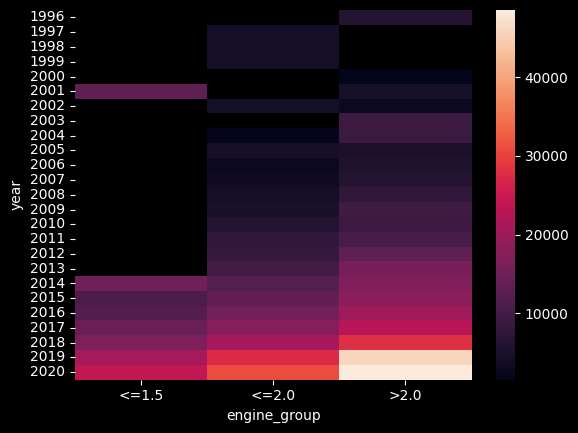

In [59]:
sns.heatmap(t)

Визуализация показывает, что цена тем выше, чем новее год выпуска авто и чем больше объем двигателя.

Обучающая выборка:

In [60]:
model_year_engine_median = model_year_engine_median.rename({'price':'price_pred_year_engine_median'},axis=1)

In [61]:
train = train.merge(model_year_engine_median,how='left',on=['year','engine_group'])

In [62]:
mean_absolute_error(train['price'], train['price_pred_year_engine_median'])

3659.774273345702

In [63]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine_median'])

0.1582922021242831

Тестовая выборка:

In [64]:
test['engine_group'] = test['engineSize'].apply(engine_group)

In [65]:
test = test.merge(model_year_engine_median,how='left',on=['year','engine_group'])

Проверка на пропуски:

In [66]:
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

In [67]:
test_no_nan = test.dropna().copy()

Проверка качества полученной модели на тестовой группе:

In [68]:
mean_absolute_error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median'])

3790.014291017075

In [69]:
mean_absolute_percentage_error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median'])

0.16270961023342095

#Улучшение модели

Сделаем группировку по годам:

In [70]:
train['year_group'] = pd.cut(train['year'],[0,2010,2012,2014,2016,2018,float('inf')])

In [71]:
train.groupby('year_group')['price'].agg(['count','median'])

,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


In [72]:
model_year_engine_group_median = train.groupby(['engine_group','year_group'])['price'].median().reset_index()

In [73]:
model_year_engine_group_median

,engine_group,year_group,price
0,<=1.5,"(0.0, 2010.0]",13000.0
1,<=1.5,"(2010.0, 2012.0]",NaN
2,<=1.5,"(2012.0, 2014.0]",14972.5
3,<=1.5,"(2014.0, 2016.0]",11557.0
4,<=1.5,"(2016.0, 2018.0]",14999.0
5,<=1.5,"(2018.0, inf]",21500.0
6,<=2.0,"(0.0, 2010.0]",4097.0
7,<=2.0,"(2010.0, 2012.0]",8470.0
8,<=2.0,"(2012.0, 2014.0]",10998.0
9,<=2.0,"(2014.0, 2016.0]",14800.0


In [74]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price':'price_pred_year_engine_group_median'},axis=1)

In [75]:
train = train.merge(model_year_engine_group_median,how='left',on=['year_group','engine_group'])

In [76]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,err_abs,err_abs_pct,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median,year_group,price_pred_year_engine_group_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,11041.347826,10490.0,<=2.0,9990.0,"(2012.0, 2014.0]",10998.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,31066.986143,27980.0,<=1.5,20980.0,"(2018.0, inf]",21500.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,15086.536313,14103.5,>2.0,18144.5,"(2014.0, 2016.0]",19497.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,31066.986143,27980.0,<=2.0,27294.0,"(2018.0, inf]",27990.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,15086.536313,14103.5,<=1.5,10999.0,"(2014.0, 2016.0]",11557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,22668.821645,4673.821645,4673.821645,0.259729,20022.0,22562.450394,21000.0,<=2.0,20750.0,"(2016.0, 2018.0]",18980.0
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,22668.821645,2718.821645,2718.821645,0.136282,20022.0,16531.655222,15699.5,>2.0,19996.5,"(2014.0, 2016.0]",19497.5
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,22668.821645,-2781.178355,2781.178355,0.109280,20022.0,31066.986143,27980.0,<=2.0,27294.0,"(2018.0, inf]",27990.0
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,22668.821645,2818.821645,2818.821645,0.142006,20022.0,16531.655222,15699.5,<=2.0,15500.0,"(2014.0, 2016.0]",14800.0


In [77]:
mean_absolute_error(train['price'], train['price_pred_year_engine_group_median'])

3827.4336425479282

In [78]:
mean_absolute_percentage_error(train['price'], train['price_pred_year_engine_group_median'])

0.1693848259731495

Качество модели осталось примерно на том же уровне, при этом количество условий было сокращено.